Processing scene: truck
Processing image: gt.png
Processing image: gs_val_step29999_0014.png


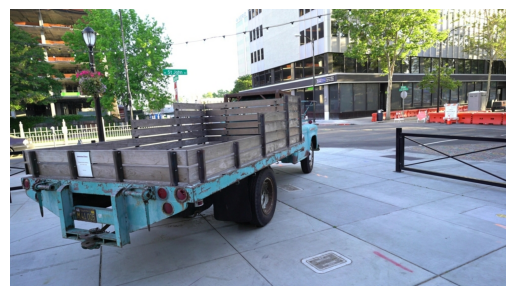

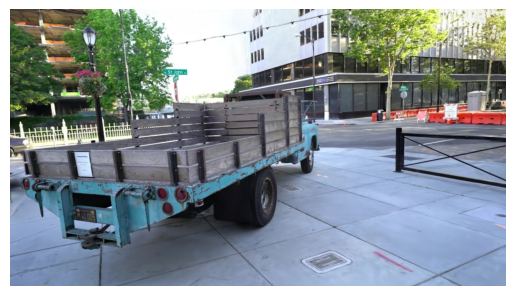

Processing image: gs.png
Processing image: ls_val_step29999_0014.png


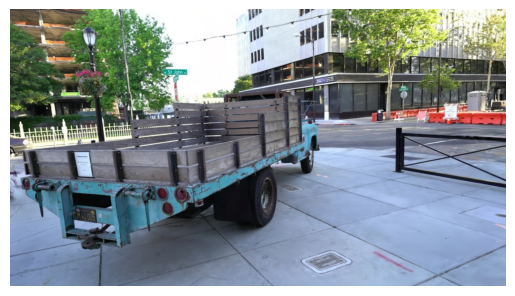

Processing image: ls.png
Processing scene: garden
Processing image: gt.png
Processing image: gs_val_step29999_0001.png


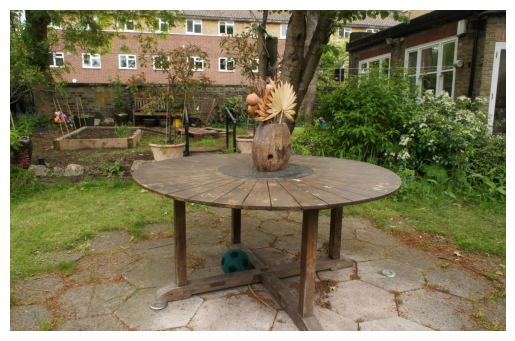

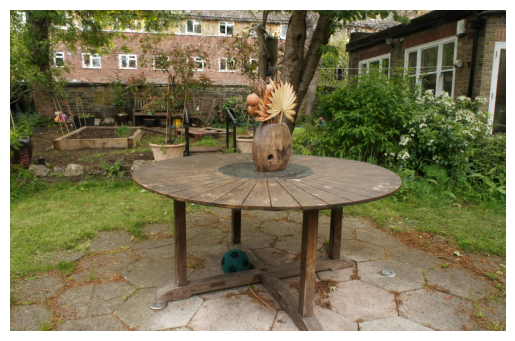

Processing image: gs.png
Processing image: ls.png
Processing image: ls_val_step29999_0001.png


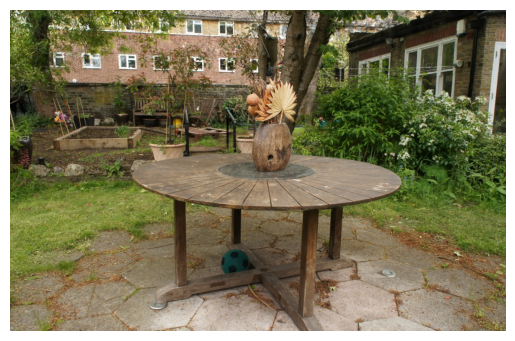

Processing scene: room
Processing image: gt.png
Processing image: ls_val_step29999_0029.png


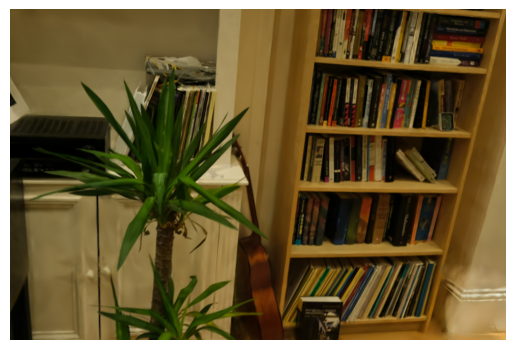

Processing image: gs.png
Processing image: ls.png
Processing image: gs_val_step29999_0029.png


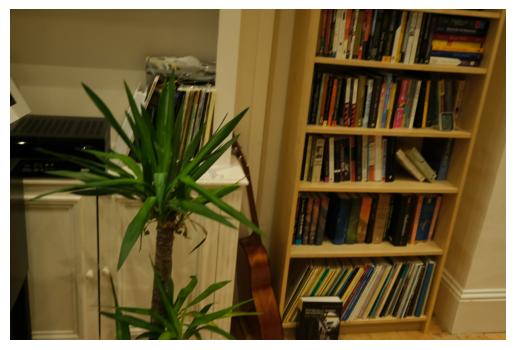

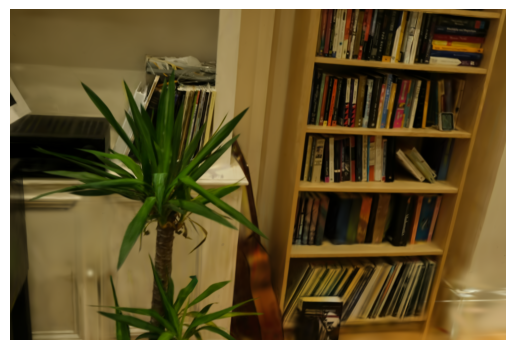

Processing scene: bycicle
Processing image: gt.png
Processing image: ls_val_step29999_0000.png


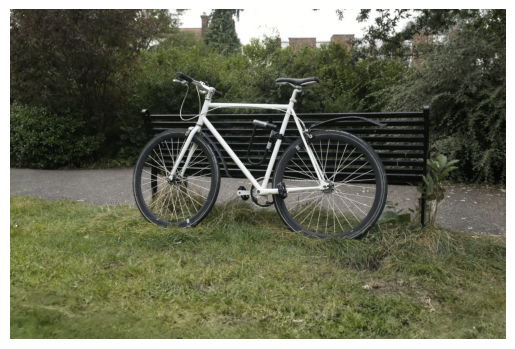

Processing image: gs.png
Processing image: gs_val_step29999_0000.png


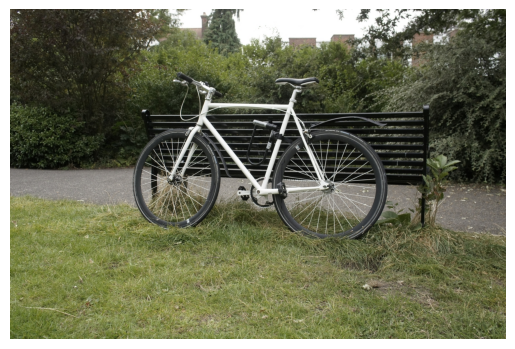

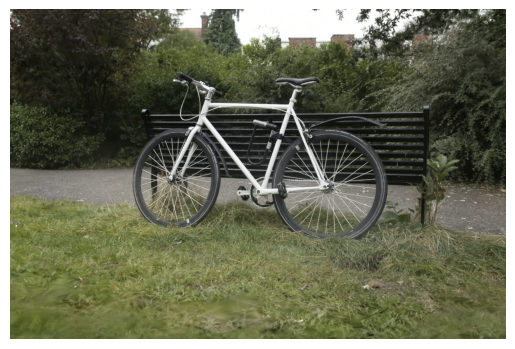

Processing image: ls.png
Processing scene: flowers
Processing image: gt.png
Processing image: ls_val_step29999_0020.png


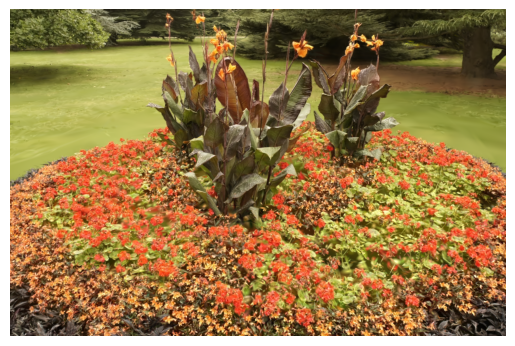

Processing image: gs.png
Processing image: gs_val_step29999_0020.png


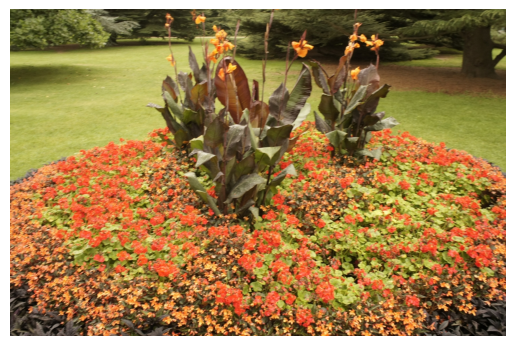

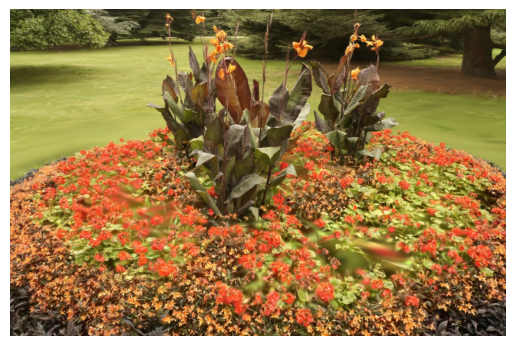

Processing image: ls.png
Processing scene: bonsai
Processing image: gt.png
Processing image: gs_val_step29999_0036.png


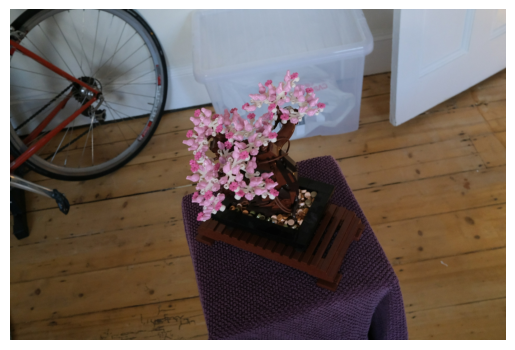

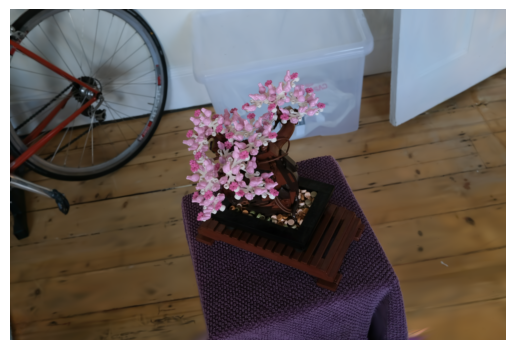

Processing image: ls_val_step29999_0036.png


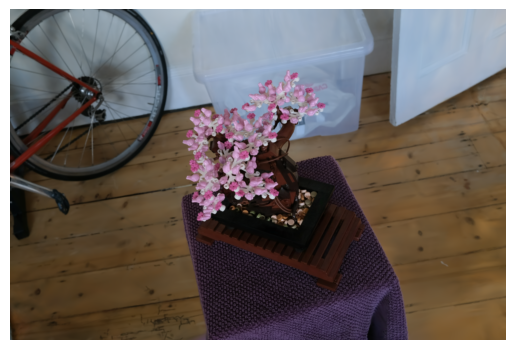

Processing image: gs.png
Processing image: ls.png
Processing scene: train
Processing image: gt.png
Processing image: gs_val_step29999_0016.png


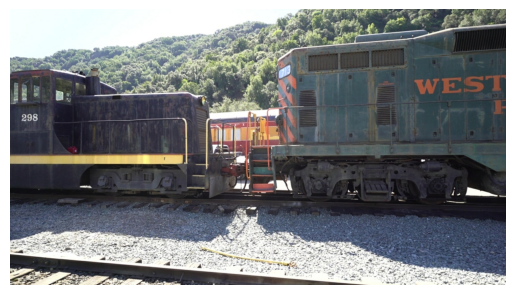

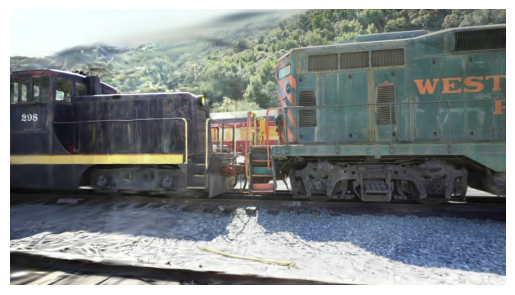

Processing image: gs.png
Processing image: ls_val_step29999_0016.png


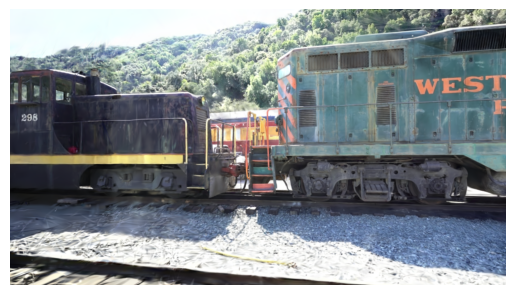

Processing image: ls.png
Processing scene: kitchen
Processing image: gt.png
Processing image: gs_val_step29999_0032.png


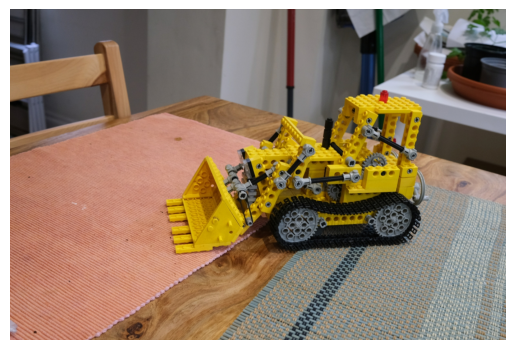

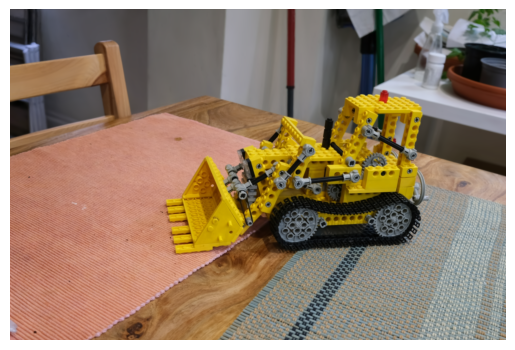

Processing image: gs.png
Processing image: ls_val_step29999_0032.png


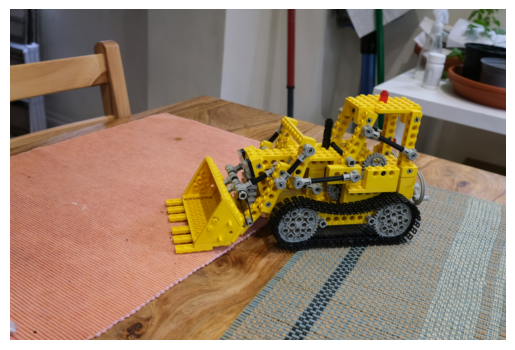

Processing image: ls.png


In [41]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the directory containing scenes
SCENES_DIR = './static/images/results/'

# Global toggles
SHOW_IMAGES = True  # Set to True to display images
SAVE_IMAGES = True   # Set to False to skip saving images


def save_image(image, filepath, format='png'):
    """
    Save the image with exact pixel dimensions.
    """
    if SAVE_IMAGES:
        # Get the exact height and width in pixels
        height, width, _ = image.shape

        # Create a figure with the exact size of the image
        fig = plt.figure(figsize=(width / 100, height / 100), dpi=100)  # Use DPI=100 for simplicity

        # Display the image
        ax = fig.add_axes([0, 0, 1, 1])  # Use the full figure area
        ax.imshow(image)
        ax.axis('off')

        # Save the image
        plt.savefig(filepath, format=format, dpi=100)  # Save with DPI=100 to match pixel dimensions
        plt.close(fig)


def show_image(image):
    """
    Display the image using matplotlib if SHOW_IMAGES is enabled.
    """
    if SHOW_IMAGES:
        plt.imshow(image)
        plt.axis('off')
        plt.show()


def process_image(scene_dir, img_name):
    """
    Process the image based on its type (gs_ or ls_).
    Extracts the respective portions and saves or displays them as needed.
    """
    img_path = os.path.join(scene_dir, img_name)
    img = mpimg.imread(img_path)

    if 'gs_' in img_name:
        img_gt = img[:, :img.shape[1] // 2, :]
        img_gs = img[:, img.shape[1] // 2:, :]

        save_image(img_gt, os.path.join(scene_dir, 'gt.png'))
        save_image(img_gs, os.path.join(scene_dir, 'gs.png'))

        show_image(img_gt)
        show_image(img_gs)

    elif 'ls_' in img_name:
        img_ls = img[:, img.shape[1] // 2:, :]
        save_image(img_ls, os.path.join(scene_dir, 'ls.png'))
        show_image(img_ls)


def process_scene(scene):
    """
    Process all images within a specific scene directory.
    """
    scene_dir = os.path.join(SCENES_DIR, scene)
    if not os.path.isdir(scene_dir):
        return

    for img_name in os.listdir(scene_dir):
        print(f"Processing image: {img_name}")
        process_image(scene_dir, img_name)


def main():
    """
    Main function to process all scenes in the directory.
    """
    for scene in os.listdir(SCENES_DIR):
        print(f"Processing scene: {scene}")
        process_scene(scene)


if __name__ == "__main__":
    main()